<a href="https://colab.research.google.com/github/Sababa123/Netflix/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Projects-Datacamp/Netflix/netflix.csv')

## Exploratory Data Analysis

In [15]:
df.columns

Index(['index', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'duration', 'description', 'genre',
       'duration_mins', 'decade'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          7787 non-null   int64         
 1   show_id        7787 non-null   object        
 2   type           7787 non-null   object        
 3   title          7787 non-null   object        
 4   director       5398 non-null   object        
 5   cast           7069 non-null   object        
 6   country        7280 non-null   object        
 7   date_added     7689 non-null   datetime64[ns]
 8   release_year   7787 non-null   int64         
 9   duration       7787 non-null   int64         
 10  description    7787 non-null   object        
 11  genre          7787 non-null   object        
 12  duration_mins  7787 non-null   float64       
 13  decade         7787 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(8)
memory usage: 851.

In [16]:
df.describe()

,index,date_added,release_year,duration,duration_mins,decade
count,7787.000000,7689,7787.000000,7787.000000,7787.000000,7787.000000
mean,3893.000000,2019-01-07 20:44:06.273897728,2013.932580,69.122769,69.122769,2008.506485
min,0.000000,2008-01-01 00:00:00,1925.000000,1.000000,1.000000,1920.000000
25%,1946.500000,2018-02-06 00:00:00,2013.000000,2.000000,2.000000,2010.000000
50%,3893.000000,2019-03-15 00:00:00,2017.000000,88.000000,88.000000,2010.000000
75%,5839.500000,2020-01-25 00:00:00,2018.000000,106.000000,106.000000,2010.000000
max,7786.000000,2021-01-16 00:00:00,2021.000000,312.000000,312.000000,2020.000000
std,2248.057606,NaN,8.757395,50.950743,50.950743,8.900010


### 1. Most frequent movie duration in the 1990s (in minutes)

In [17]:
# Filter for movies released between 1990 and 1999
movies_90s = df[(df['type'] == 'Movie') & (df['release_year'].between(1990, 1999))].copy()

# Extract numeric duration in minutes
movies_90s['duration_mins'] = movies_90s['duration'].astype(str).str.extract(r'(\d+)').astype(int)

# Calculate most frequent duration
duration = movies_90s['duration_mins'].mode().iloc[0]

print("Most frequent movie duration in the 1990s (in minutes):", duration)

Most frequent movie duration in the 1990s (in minutes): 94


### 2. Number of short action movies (<90 minutes) in the 1990s

In [18]:
# Count short (<90 min) action movies
action_short_90s = movies_90s[
    (movies_90s['duration_mins'] < 90) &
    (movies_90s['genre'].str.contains('Action', case=False, na=False))
]
short_movie_count = len(action_short_90s)

print("Number of short action movies (<90 minutes) in the 1990s:", short_movie_count)

Number of short action movies (<90 minutes) in the 1990s: 8


In [19]:
df['duration_mins'] = df['duration'].astype(str).str.extract(r'(\d+)').astype(float)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['decade'] = (df['release_year'] // 10 * 10).astype(int)

### 3. Content Growth Over Time

<Figure size 640x480 with 0 Axes>

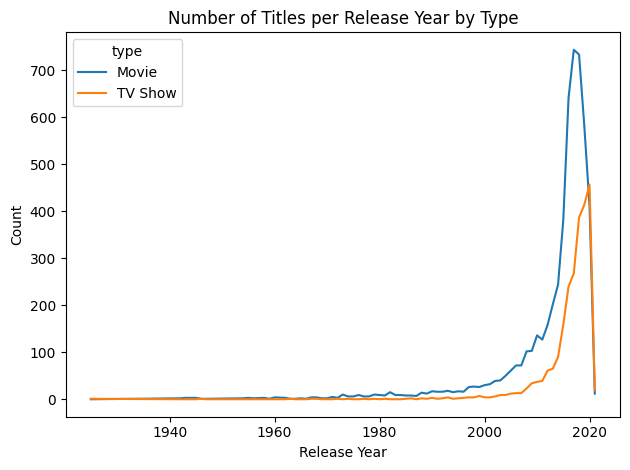

In [6]:
# Titles per release year by type
year_type = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
plt.figure()
year_type.plot()
plt.title('Number of Titles per Release Year by Type')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Both movies and TV shows have surged in quantity since the early 2000s, with movies peaking around 2018 and TV shows quickly catching up soon after.

### 4. How Movie Durations Evolved by Decade

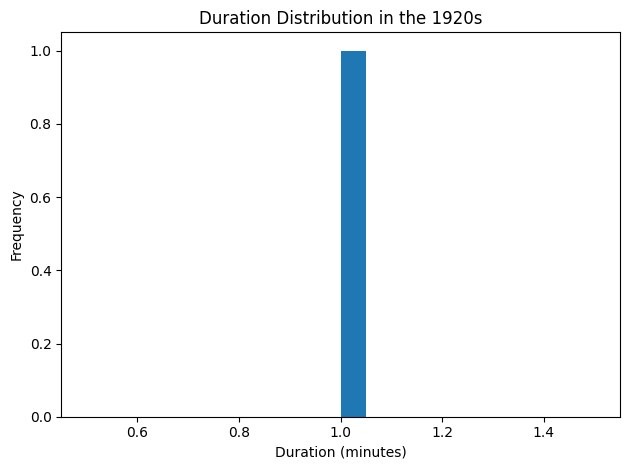

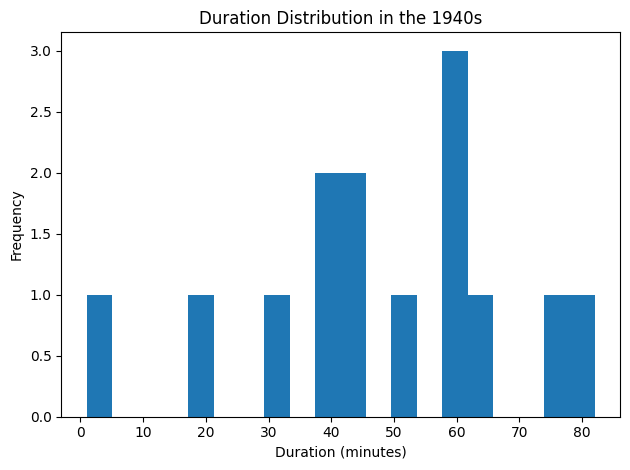

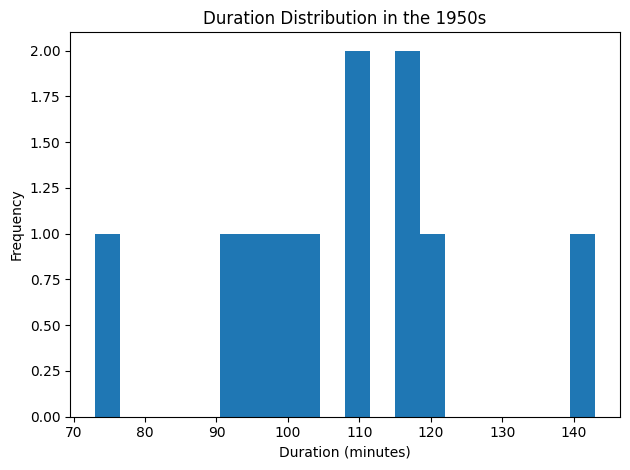

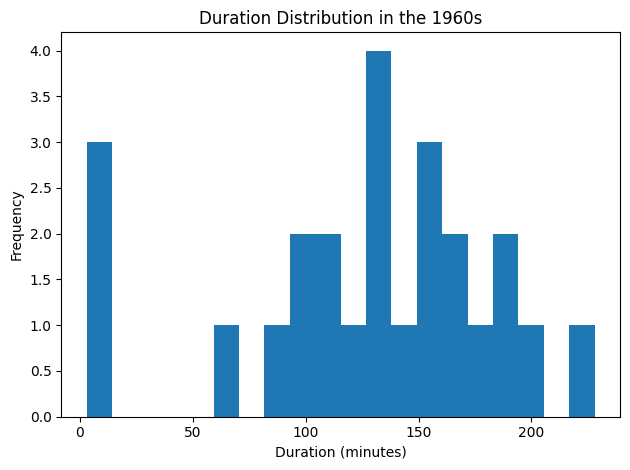

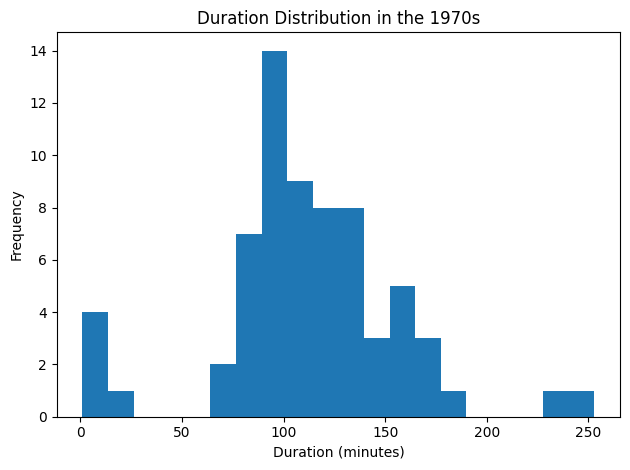

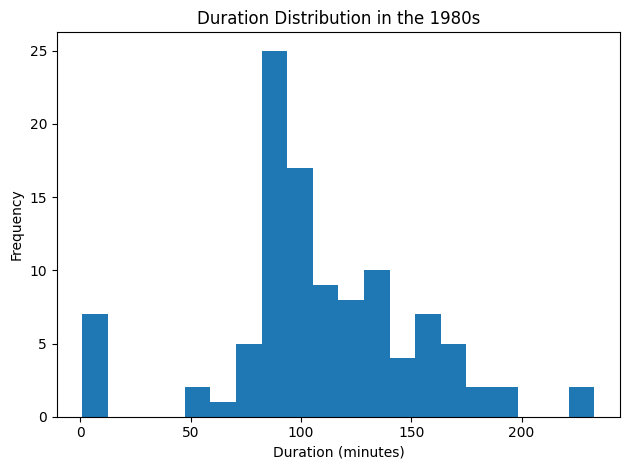

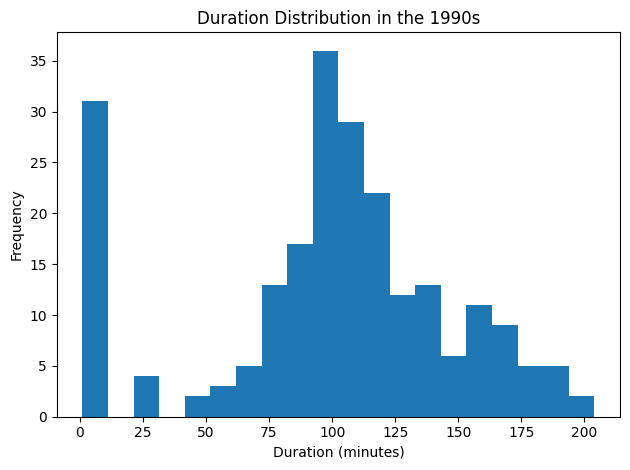

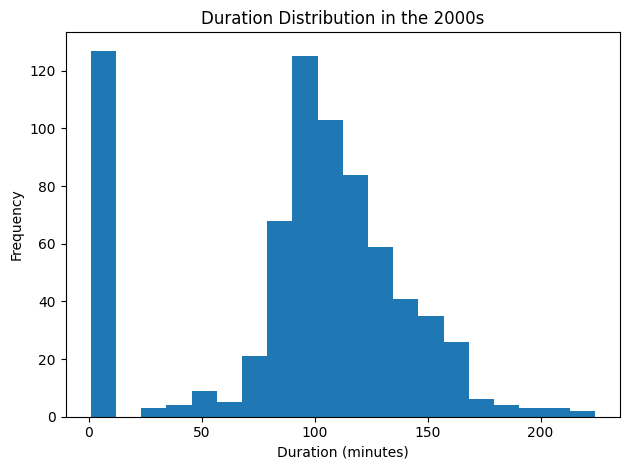

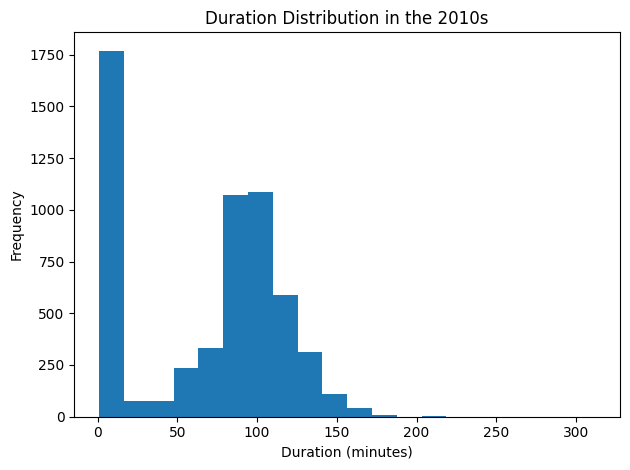

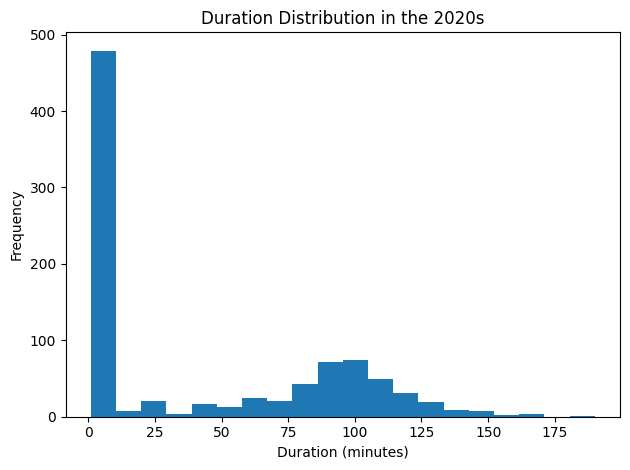

In [7]:
# Duration distribution by decade
for decade in sorted(df['decade'].dropna().unique()):
    subset = df[df['decade'] == decade]['duration_mins'].dropna()
    if subset.empty:
        continue
    plt.figure()
    plt.hist(subset, bins=20)
    plt.title(f'Duration Distribution in the {decade}s')
    plt.xlabel('Duration (minutes)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Early decades (1920s–50s) are patchy due to fewer entries, but from the 1970s onward we see a clear middle band around 90–120 min. The long tail (200 + min) becomes more pronounced in the 1970s and 1980s, then shrinks as streaming favors more concise runtimes in the 2010s–20s.

### 5. Top 10 Genres on Netflix

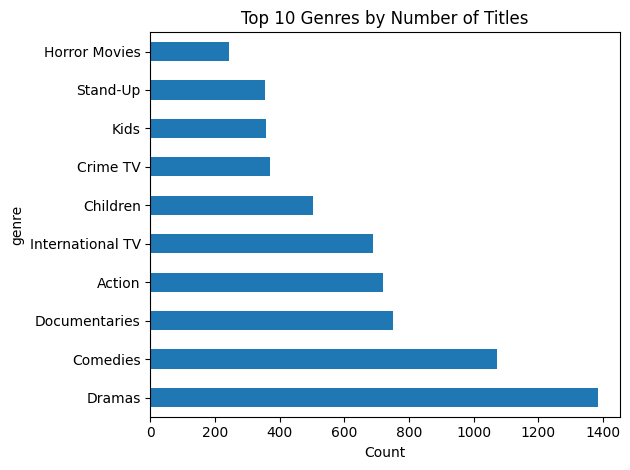

In [8]:
# Top 10 genres
genres = df['genre'].dropna().str.split(',').explode().str.strip()
top_genres = genres.value_counts().nlargest(10)
plt.figure()
top_genres.plot(kind='barh')
plt.title('Top 10 Genres by Number of Titles')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

Drama titles dwarf other genres, but comedy and documentary both have strong showings. Short‑form & stand‑up content has also grown.

### 6. Duration Spread Within Top Genres

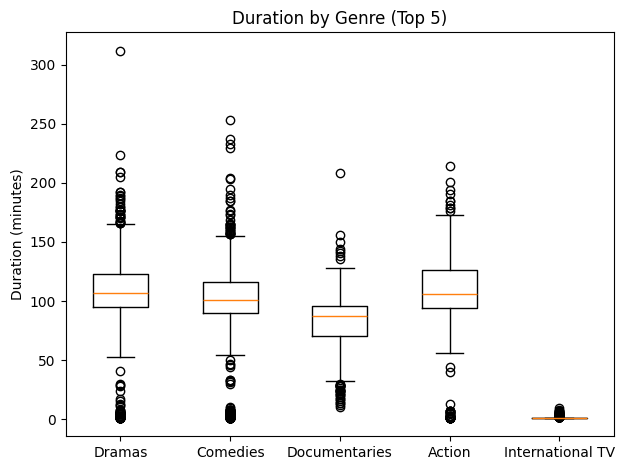

In [10]:
# Boxplot of durations for top 5 genres
top5 = top_genres.index[:5]
durations_by_genre = [df[df['genre'].str.contains(g, na=False)]['duration_mins'].dropna() for g in top5]
plt.figure()
plt.boxplot(durations_by_genre, tick_labels=top5)
plt.title('Duration by Genre (Top 5)')
plt.ylabel('Duration (minutes)')
plt.tight_layout()
plt.show()

Different genres carry very distinct runtime signatures, which could guide content strategy or viewer recommendations.

### 7. Most Prolific Directors

In [11]:
# Top 10 directors
directors = df['director'].dropna().str.split(',').explode().str.strip()
top_directors = directors.value_counts().nlargest(10)
directors_df = top_directors.reset_index()
directors_df.columns = ['Director', 'Number of Titles']

# Display table
print('Top 10 Directors:')
directors_df

Top 10 Directors:


,Director,Number of Titles
0,Jan Suter,21
1,Raúl Campos,19
2,Marcus Raboy,16
3,Jay Karas,15
4,Cathy Garcia-Molina,13
5,Martin Scorsese,12
6,Youssef Chahine,12
7,Jay Chapman,12
8,Steven Spielberg,10
9,Shannon Hartman,9


A small cadre of directors/champions power a surprising share of Netflix’s catalogue—valuable for partnership negotiations or spotlight series.